# Clustering

### Kmeans Clustering  &   K Mediods

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters = 5, random_state = 25)

In [7]:
ykmeans = model.fit_predict(X)

In [8]:
ykmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [9]:
X.shape

(200, 2)

In [10]:
ykmeans.shape

(200,)

In [11]:
cntrs = model.cluster_centers_

In [12]:
model.inertia_

44448.45544793371

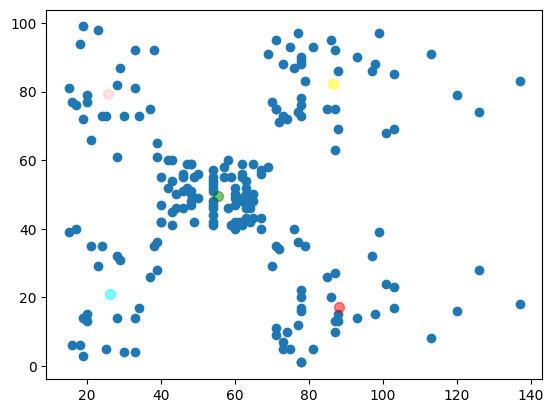

In [13]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])
plt.scatter(model.cluster_centers_[0,0],model.cluster_centers_[0,1], c ='red', s = 50, alpha = 0.5)
plt.scatter(model.cluster_centers_[1,0],model.cluster_centers_[1,1], c ='green', s = 50, alpha = 0.5)
plt.scatter(model.cluster_centers_[2,0],model.cluster_centers_[2,1], c ='yellow', s = 50, alpha = 0.5)
plt.scatter(model.cluster_centers_[3,0],model.cluster_centers_[3,1], c ='pink', s = 50, alpha = 0.5)
plt.scatter(model.cluster_centers_[4,0],model.cluster_centers_[4,1], c ='Cyan', s = 50, alpha = 0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

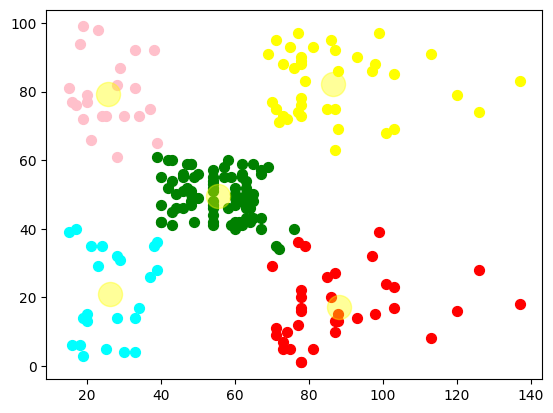

In [14]:
plt.scatter(X.iloc[ykmeans == 0,0], X.iloc[ykmeans == 0,1], s = 50, c ='red', label = 'C1')
plt.scatter(X.iloc[ykmeans == 1,0], X.iloc[ykmeans == 1,1], s = 50, c ='green', label = 'C2')
plt.scatter(X.iloc[ykmeans == 2,0], X.iloc[ykmeans == 2,1], s = 50, c ='yellow', label = 'C3')
plt.scatter(X.iloc[ykmeans == 3,0], X.iloc[ykmeans == 3,1], s = 50, c ='pink', label = 'C4')
plt.scatter(X.iloc[ykmeans == 4,0], X.iloc[ykmeans == 4,1], s = 50, c ='cyan', label = 'C5')
plt.scatter(cntrs [:,0], cntrs [:,1],s=300 , c ='yellow', label='Centroids', alpha = .4)
plt.show

In [15]:
# The Elbow Method

model.inertia_

44448.45544793371

In [16]:
# wcss(Within Cluster Sum of Square)

wcss = []
for i in range (1,11):
    model = KMeans(n_clusters = i, random_state = 25)
    model.fit(X)
    wcss.append(model.inertia_)

In [17]:
wcss

[269981.28,
 186362.95600651758,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 31855.17939562344,
 27050.670071297747,
 24063.02257582819]

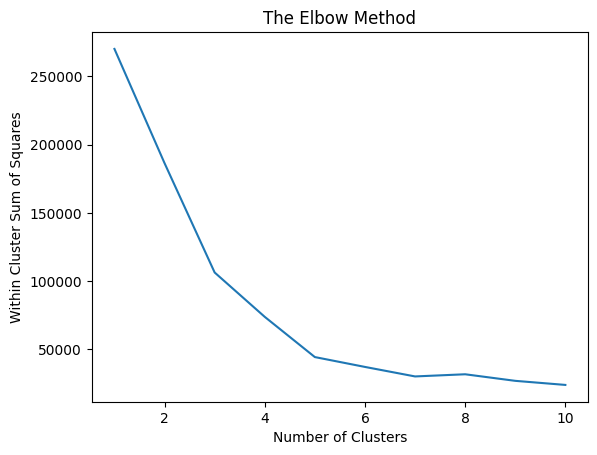

In [18]:
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('The Elbow Method')
plt.show()

# Performance Metric
### Silhouette Score

- Intra Cluster distance - It is the average distance between the points within the same cluster <br>
- Inter Cluster Distance - It is the distance between two clusters

In [19]:
from sklearn.metrics import silhouette_score

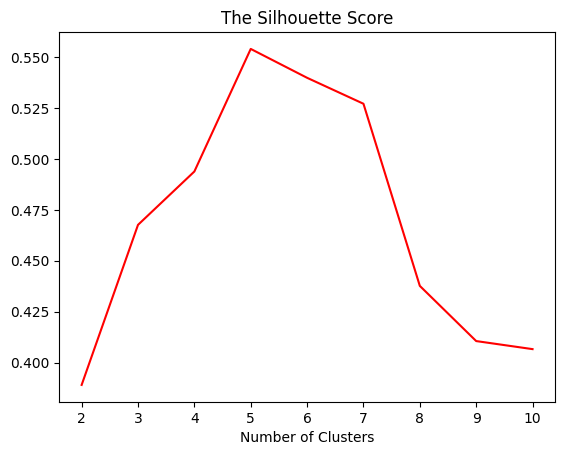

In [20]:
wcss = []
ss = []
for i in range (2,11):
    model = KMeans(n_clusters = i, random_state = 25)
    model.fit(X)
    wcss.append(model.inertia_)
    ss.append(silhouette_score(X, model.labels_))


plt.plot(range(2,11), ss, color = 'red', label = 'Silhouette Score')
plt.xlabel('Number of Clusters')
plt.title('The Silhouette Score')
plt.show()

# Hierarchical Clustering

- Agglomerative (Bottom to up upproach)
- Divisive (Entire dataset is one cluster and divide them in hierarchical manner untill all each datapoints is one cluster)

In [21]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [22]:
df1 = X.iloc[:51,:]

In [23]:
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


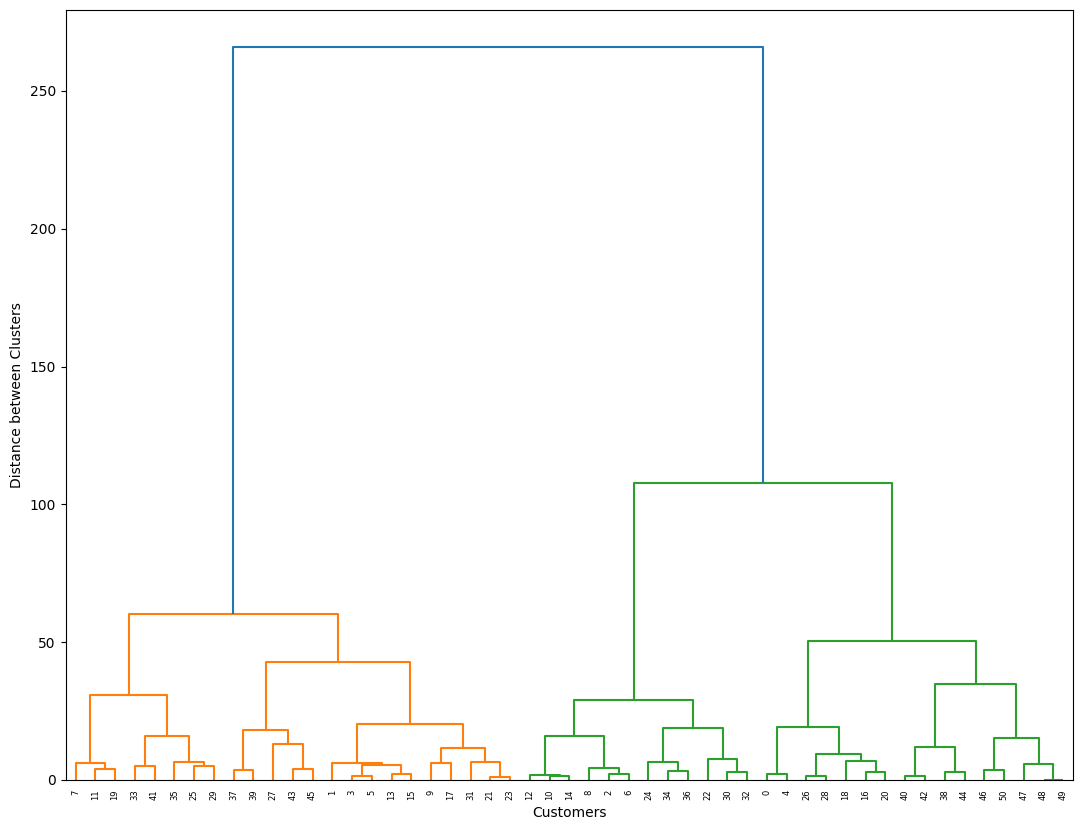

In [24]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (13,10))
dend = shc.dendrogram(shc.linkage(df1, method = 'ward'))
plt.xlabel('Customers')
plt.ylabel('Distance between Clusters')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

model.fit(df1)

AgglomerativeClustering(n_clusters=3)

In [26]:
model.labels_

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1], dtype=int64)

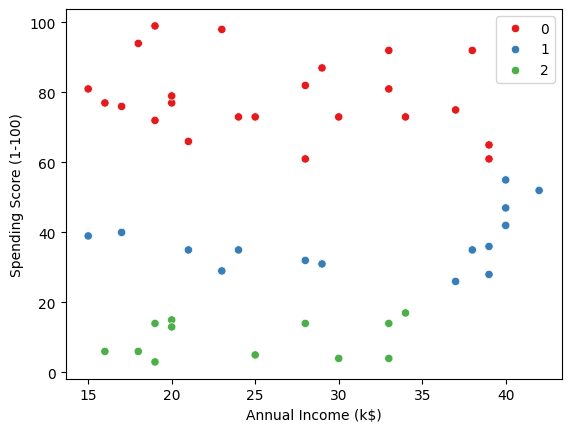

In [27]:
import seaborn as sns
sns.scatterplot (x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = model.labels_, data = df1, palette = 'Set1')
plt.show()

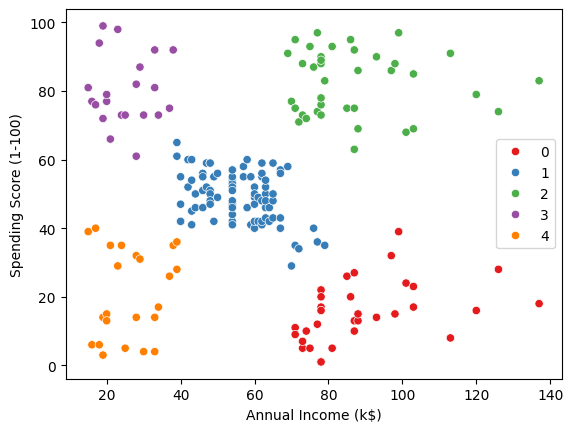

In [28]:
model = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')

model.fit(X)
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = model.labels_ , data = X , palette = 'Set1')
plt.show()

# DBSCAN - Density Based Spatial Clustering Application with Noise

In [30]:
# Implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

In [31]:
data = pd.read_csv('Mall_customers.csv')

In [32]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [33]:
X = data[[ 'Annual Income (k$)', 'Spending Score (1-100)']]

X_train, X_test = train_test_split(X, test_size = 0.4, random_state = 42)

In [34]:
db = DBSCAN(eps = 5, min_samples = 5)

db.fit(X_train)
labels_train = db.labels_

labels_test = db.fit_predict(X_test)

In [37]:
labels_train

array([-1,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1,  1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1, -1, -1, -1,
        0, -1,  0, -1,  1, -1, -1,  0,  1, -1, -1, -1, -1, -1,  0, -1, -1,
        0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0, -1, -1,  0,
        0,  0, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0,
        0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0,
        1, -1,  1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0, -1,
       -1], dtype=int64)

In [42]:
# Number of Clusters ignorinig Noise

n_cluster_train = len(set(labels_train)) - (1 if -1 in labels_train else 0)
n_noise_train = list(labels_train).count(-1)

n_cluster_test = len(set(labels_test)) - (1 if -1 in labels_test else 0)
n_noise_test = list(labels_test).count(-1)

In [43]:
X_train.shape, X_test.shape

((120, 2), (80, 2))

In [44]:
print(f'Estimated nuber of clusters in Train: {n_cluster_train}')
print(f'Estimated nuber of Noise Points in Train: {n_noise_train}')

print(f'Estimated nuber of clusters in Test: {n_cluster_test}')
print(f'Estimated nuber of Noise Points in Test: {n_noise_test}')

Estimated nuber of clusters in Train: 2
Estimated nuber of Noise Points in Train: 75
Estimated nuber of clusters in Test: 2
Estimated nuber of Noise Points in Test: 58


In [46]:
# Visualize Results

train_set = X_train
train_set['labels'] = labels_train

train_set.head(2)

,Annual Income (k$),Spending Score (1-100),labels
2,16,6,-1
77,54,48,0


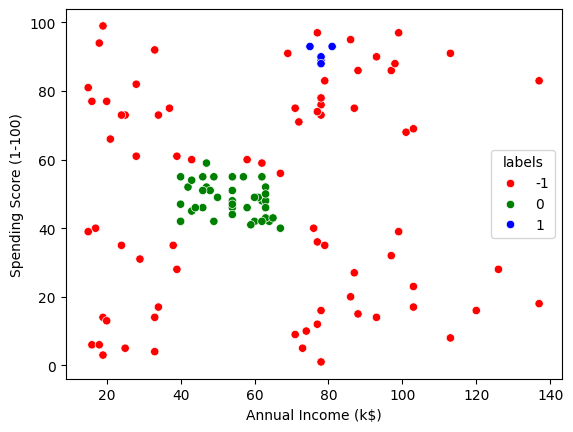

In [48]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'labels', data = train_set, palette = ['red','green', 'blue'])
plt.show()

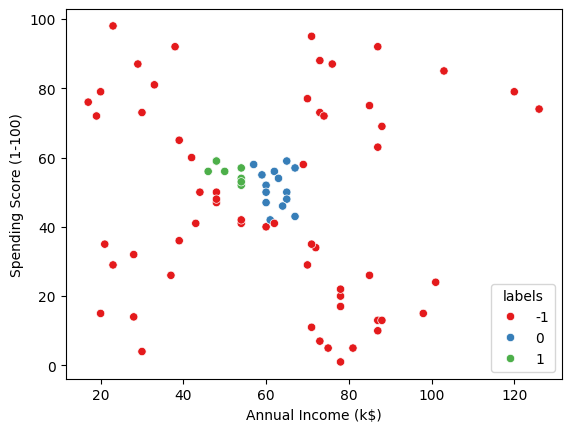

In [51]:
test_set = X_test
test_set['labels'] = labels_test


sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'labels', data = test_set, palette = 'Set1')
plt.show()

C:\Users\0litt\AppData\Local\Temp\ipykernel_8700\3503410323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_set['labels'] = full_labels


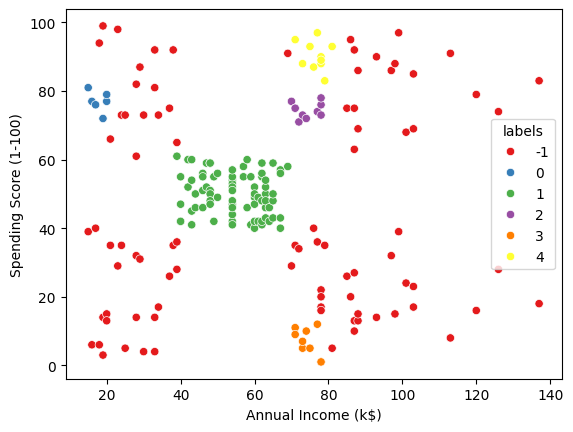

In [52]:
db.fit(X)
full_labels = db.labels_
full_set = X
full_set['labels'] = full_labels


sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'labels', data = full_set, palette = 'Set1')
plt.show()